# LightGBM inference
This notebooks demonstrates generating inferences from a pretrained LightGBM model. This notebook utilizes the `deepfuel-ML/src/test.py` script for generating inferences. The script does everything from calculating error values to plotting data for visual inference. 

In [1]:
import os
import pandas as pd
import numpy as np
from joblib import dump, load
import sys
import os
from IPython.display import Image, display

### Using `test.py`
Below is the description of its arguements:
 - `--model_name`:  Name of the model to be trained ("CatBoost" or "LightGBM").
 - `--model_path`:  Path to the pre-trained model.
 - `--data_path`:  Valid data directory where all the test .csv files are stored.
 - `--results_path`:  Directory where the result inference .csv files and .png visualizations are going to be stored.

### With Ground Truth (`actual_load` is present in the test csv)

In [2]:
!python '../src/test.py'  --model_name 'LightGBM' --model_path '../src/results/pre-trained_models/LightGBM.joblib' --data_path 'infer_tropics'  --results_path 'tropics/results'

MAPE  Oct  : 1384.9468761708176
MAPE  Dec  : 810.3682446705026
MAPE  Sept  : 2838.2082285500596
MAPE  Aug  : 5351.446462150303
MAPE  July  : 342.7173513565079
MAPE  Nov  : 1843.7804424386982
Actual FL plot successfully generated! File saved to  tropics/results/tropics_July_actual.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_July_predicted.png
Actual FL plot successfully generated! File saved to  tropics/results/tropics_Sept_actual.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_Sept_predicted.png
Actual FL plot successfully generated! File saved to  tropics/results/tropics_Oct_actual.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_Oct_predicted.png
Actual FL plot successfully generated! File saved to  tropics/results/tropics_Aug_actual.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_Aug_predicted.png
Actual FL plot successfully generated

### Inference CSV
`test.py` generates `.csv` files for each month with the following columns:
 - `latitude`
 - `longitude`
 - `actual_load` - Actual Fuel Load value
 - `predicted_load`  - Predicted Fuel Load value
 - `APE` - Average Percentage Error between actual and predicted fuel load values

In [3]:
df=pd.read_csv('tropics/results/tropics_output_July.csv')
df.head()

,lat,lon,actual_load,predicted_load,APE
0,-29.875,29.125,1.876688e+08,3.501760e+08,86.592562
1,-29.875,29.375,2.971511e+08,3.078153e+08,3.588819
2,-29.875,29.625,1.518198e+08,2.413729e+08,58.986407
3,-29.875,29.875,3.022351e+08,2.899233e+08,4.073588
4,-29.875,30.125,3.009002e+08,3.475604e+08,15.506859


### Visualizing the plots generated

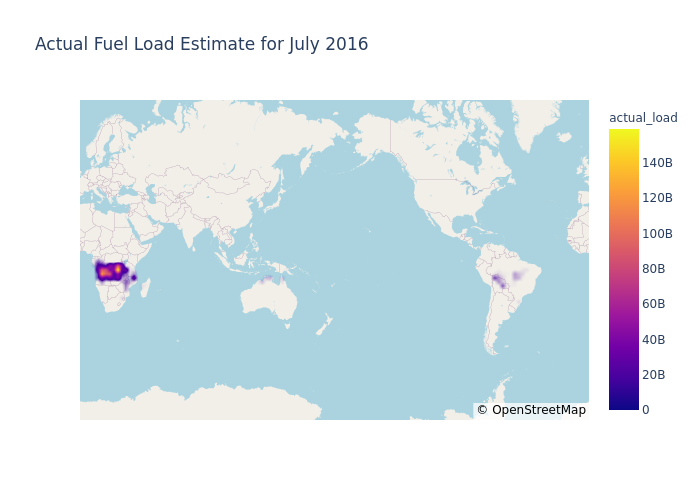

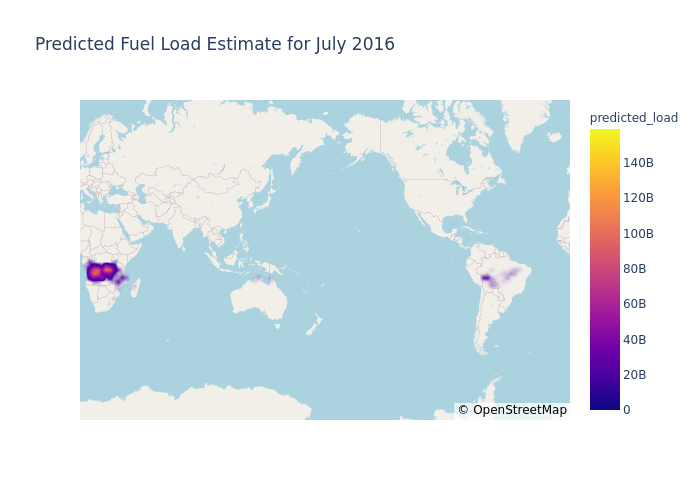

In [4]:
actual=Image(filename='tropics/results/tropics_July_actual.png') 
predicted=Image(filename='tropics/results/tropics_July_predicted.png') 
display(actual,predicted) 


### Without Ground Truth (`actual_load` is not present in the test csv)

In [7]:
!python '../src/test.py'  --model_name 'LightGBM' --model_path '../src/results/pre-trained_models/LightGBM.joblib' --data_path 'infer_tropics'  --results_path 'tropics/results'

Predicted FL plot successfully generated! File saved to  tropics/results/tropics_July_predicted.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_Sept_predicted.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_Oct_predicted.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_Aug_predicted.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_Dec_predicted.png
Predicted FL plot successfully generated! File saved to  tropics/results/tropics_Nov_predicted.png


### Inference CSV

In [9]:
df=pd.read_csv('tropics/results/tropics_output_July.csv')
df.head()

,lat,lon,predicted_load
0,-29.875,29.125,3.501760e+08
1,-29.875,29.375,3.078153e+08
2,-29.875,29.625,2.413729e+08
3,-29.875,29.875,2.899233e+08
4,-29.875,30.125,3.475604e+08


### Visualizing the plots generated

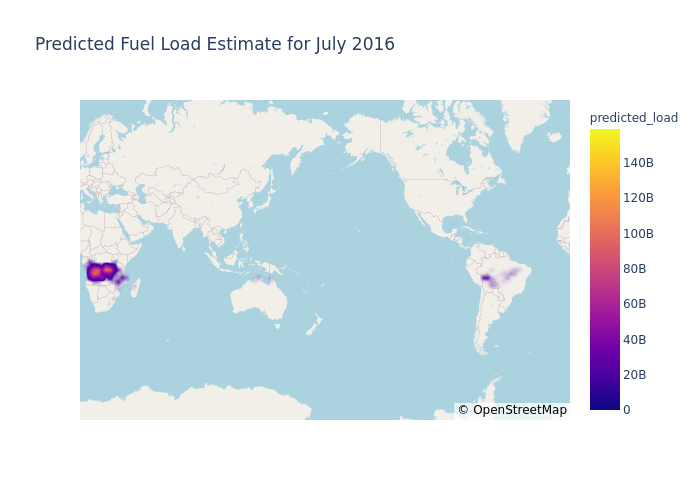

In [10]:
predicted=Image(filename='tropics/results/tropics_July_predicted.png') 
display(predicted) 
